# Knot theory in Sage

## Representation of knots.

A Knot (or a Link) can be represented by three different conventions:

- Oriented Gauss code
- PlanarDiagram code
- Braid


Notice that these representations are in fact representations of a particular diagram.

### Oriented Gauss code:

It is a list of two lists. The first one contains a list with the crossings of each component. The second list contains the orientation of each crossing.

- Number the crossings from 1 to n
- For each component, list the crossings it goes through; with a positive sign if it goes over the crossing and negative if it goes under.
- The second list contains 1's and -1's indicating the orientation of each crossing.

### Planar Diagram Code

- Number the strands (beware, overcrossings also separate strands).
- Orient the Knot/Link
- Represent each crossing with a list with the four strands, starting by the incomimg undercrossing and going clockwise
 

### Braid 

Give a braid (usually generated by the Tietze list). The knot/link is created as the closure of the braid.

## Exercise

Create the figure eight knot with each convention.

In [1]:
K = Knot([[[1,-2,3,-1,2,-3]],[1,1,1]])

In [2]:
K

Knot represented by 3 crossings

In [3]:
K.alexander_polynomial??

In [ ]:
K2 = Knot([[4,2,1,6],[2,3,5,1],[3,4,6,5]])

In [5]:
K2

Knot represented by 3 crossings

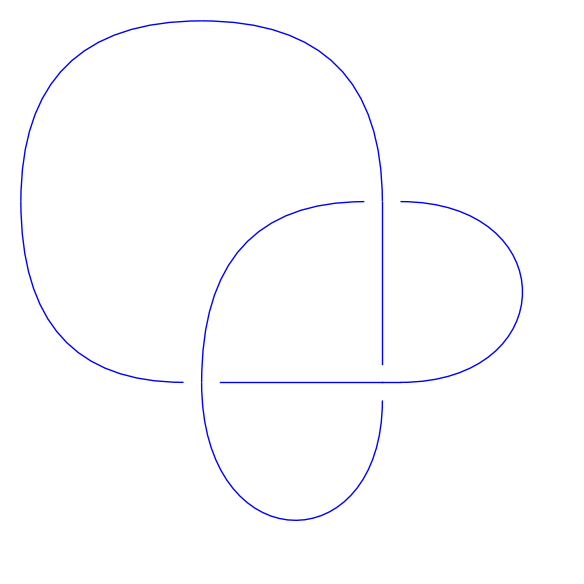

In [6]:
K.plot()

In [8]:
K.oriented_gauss_code()

[[[1, -2, 3, -1, 2, -3]], [1, 1, 1]]

In [9]:
K.pd_code()

[[4, 1, 5, 2], [2, 5, 3, 6], [6, 3, 1, 4]]

In [10]:
K2.oriented_gauss_code()

[[[2, -3, 1, -2, 3, -1]], [-1, -1, -1]]

In [11]:
K2.pd_code()

[[4, 2, 1, 6], [2, 3, 5, 1], [3, 4, 6, 5]]

In [12]:
B = BraidGroup(2)

In [13]:
b = B([1,1,1])

In [ ]:
K3 = Knot(b)

In [15]:
K3

Knot represented by 3 crossings

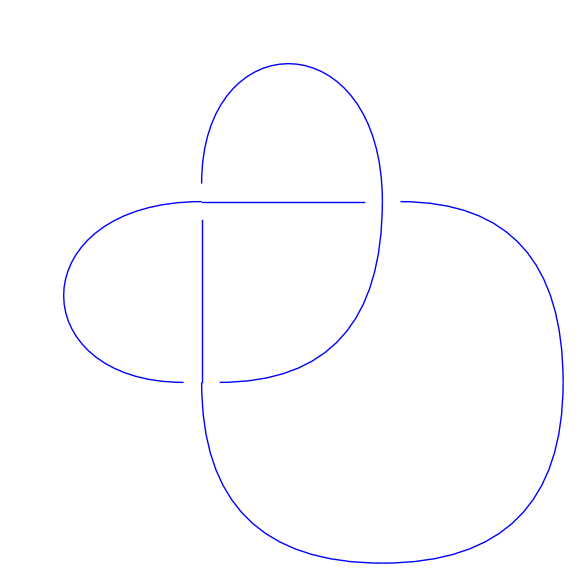

In [16]:
K3.plot()

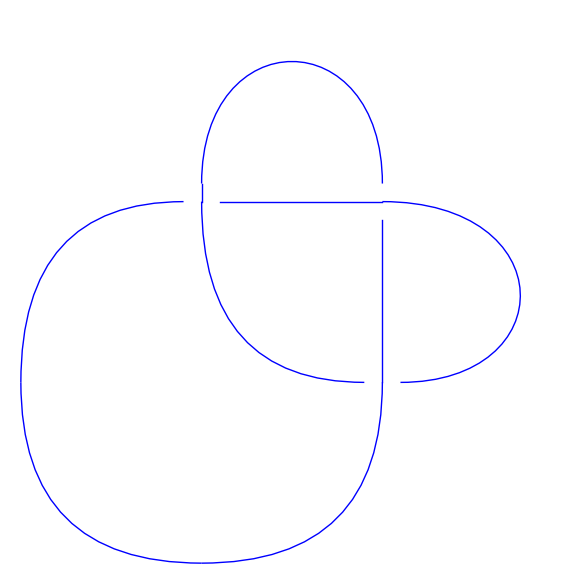

In [7]:
K2.plot()

## Represent knots and links:

- The .plot method creates a picture of the knot/link

Construct and plot the two trefoil knots, the Hopf link with two components, and the figure eight.

In [1]:
K8=Knot([[[1,-2,4,-3,2,-1,3,-4]],[1,1,-1,-1]])

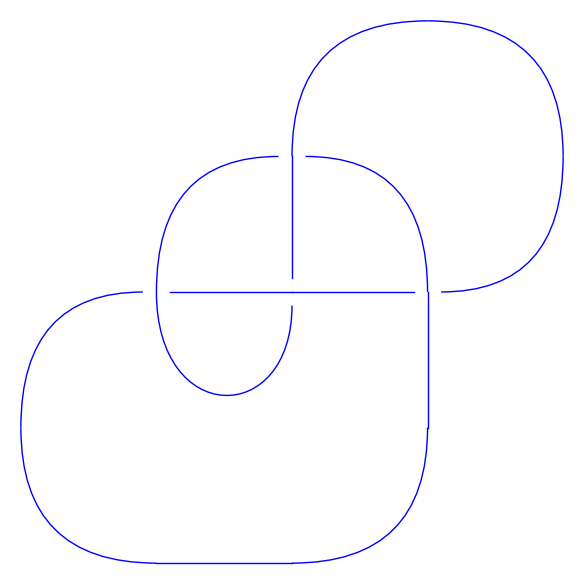

In [2]:
K8.plot()

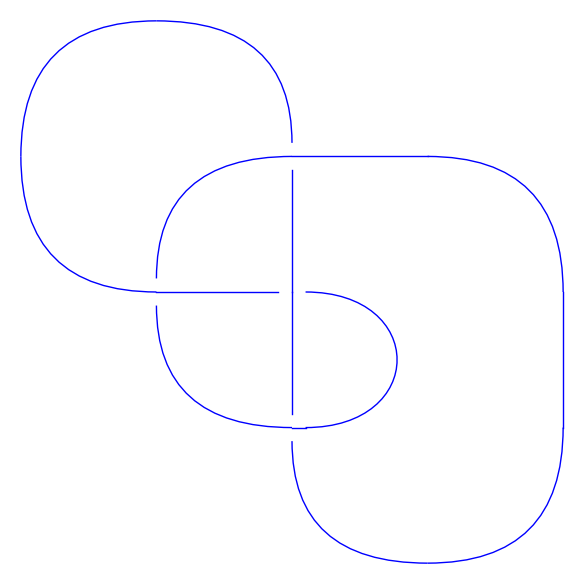

In [5]:
K8.braid().plot()

## Construction of knots and links from others:

Look for the help of the .mirror_image and .connected_sum methods. Create new knots from the previous ones.

Notice that .connected_sum does not work on Links. Why?

In [8]:
K8.mirror_image()

Knot represented by 4 crossings

## Invariants

Go through the methods available for knots and links and identify those that give invariants.

In [9]:
K8.alexander_polynomial()

-t^-1 + 3 - t

In [10]:
K8.alexander_polynomial??

In [15]:
K8.jones_polynomial()

t^2 - t - 1/t + 1/t^2 + 1

In [17]:
K8.regions()

[[1, 7, -4], [2, -5, -7], [3, -8, 5], [4, 8], [6, -1, -3], [-2, -6]]

In [18]:
K8.pd_code()

[[6, 1, 7, 2], [2, 5, 3, 6], [4, 8, 5, 7], [8, 4, 1, 3]]

In [19]:
K8.

[1, 1, -1, -1]

In [20]:
K8.seifert_circles()

[[1, 7, 5, 3], [2, 6], [4, 8]]

In [21]:
K8.jones_polynomial??

## Joint project:

Write a function that, given a knot or link, returns the fundamental group of its complement.


#### Help:

Finitely presented groups can be generated in Sage as quotients of Free Groups.

FreeGroups are generated passing the number of generators. Their n'th generator can be retrieved by F.gen(n).

#### Auxiliary tasks:

Write a function that identifies the 

In [22]:
F= FreeGroup(3)

In [23]:
F

Free Group on generators {x0, x1, x2}

In [24]:
F.inject_variables()

Defining x0, x1, x2


In [25]:
x0*x2^2/x1

x0*x2^2*x1^-1

In [26]:
G = F.quotient([x0^2,x1^2,x2^2,x1*x0/x1/x0,x1*x2/x1/x2,x0*x2/x0/x2])

In [27]:
G

Finitely presented group < x0, x1, x2 | x0^2, x1^2, x2^2, x1*x0*x1^-1*x0^-1, x1*x2*x1^-1*x2^-1, x0*x2*x0^-1*x2^-1 >

In [28]:
G.cardinality()

8

In [30]:
G.as_permutation_group()

Permutation Group with generators [(1,2)(3,5)(4,6)(7,8), (1,3)(2,5)(4,7)(6,8), (1,4)(2,6)(3,7)(5,8)]

In [32]:
G.as_permutation_group??

In [34]:
[i*K8.braid()*i^-1 for i in FreeGroup(K8.braid().strands()).gens()]

[x1*x2^-1*x1^-1*x0*x1*x2*x1*x2^-1*x1^-1*x0^-1*x1*x2*x1^-1*x0^-1,
 x1*x2^-1*x1^-1*x0*x1*x2*x1^-1*x2^-1*x1^-1*x0^-1*x1*x2*x1^-1*x0*x1*x2*x1*x2^-1*x1^-1*x0^-1*x1*x2*x1^-2,
 x1*x2^-1*x1^-1*x0*x1*x2*x1^-1*x2^-1]

In [29]:
def fundamental_group(K):
    gauss_code = K.oriented_gauss_code()
    crossing_list=gauss_code[0][0]
    negative_indices = [i for i in range(len(crossing_list)) if crossing_list[i]<0]
    gens = [crossing_list[negative_indices[i]:negative_indices[i+1]+1] for i in range(len(negative_indices)-1)]
    gens.append(crossing_list[negative_indices[-1]:]+crossing_list[:negative_indices[0]+1])
    relations = []
    for cros in range(len(gauss_code[1])):
        gi = [g for g in gens if cros+1 in g][0]
        gj = [g for g in gens if -(cros+1)==g[-1]][0]
        giind = gens.index(gi)
        gjind = gens.index(gj)
        gkind = gjind + 1
        if gkind >= len(gens):
            gkind = 0
        if gauss_code[1][cros] > 0:
            relations.append([giind+1,gkind+1,-giind-1,-gjind-1])
        else:
            relations.append([giind+1,gjind+1,-giind-1,-gkind-1])
    F = FreeGroup(len(gens))
    return F.quotient(relations)

In [31]:
G = fundamental_group(K8)

In [33]:
G.simplified()

Finitely presented group < x0, x3 | x3*x0^-1*x3*x0*x3^-1*x0^-1*x3*x0^-1*x3^-1*x0 >

In [3]:
gauss_code=K8.oriented_gauss_code()
gauss_code

[[[1, -2, 4, -3, 2, -1, 3, -4]], [1, 1, -1, -1]]

In [4]:
crossing_list=gauss_code[0][0]
crossing_list

[1, -2, 4, -3, 2, -1, 3, -4]

In [5]:
negative_indices = [i for i in range(len(crossing_list)) if crossing_list[i]<0]
negative_indices

[1, 3, 5, 7]

In [14]:
gens = [crossing_list[negative_indices[i]:negative_indices[i+1]+1] for i in range(len(negative_indices)-1)]
gens

[[-2, 4, -3], [-3, 2, -1], [-1, 3, -4]]

In [16]:
gens.append(crossing_list[negative_indices[-1]:]+crossing_list[:negative_indices[0]+1])

In [17]:
gens

[[-2, 4, -3], [-3, 2, -1], [-1, 3, -4], [-4, 1, -2]]

In [18]:
cros = 0
cros+1

1

In [22]:
gi = [g for g in gens if cros+1 in g][0]
gi

[-4, 1, -2]

In [23]:
gj = [g for g in gens if -(cros+1)==g[-1]][0]
gj

[-3, 2, -1]

In [24]:
giind = gens.index(gi)
giind

3

In [25]:
gjind = gens.index(gj)
gjind

1

In [34]:
B = BraidGroup(2)
K = Knot(B([1,1,1]))

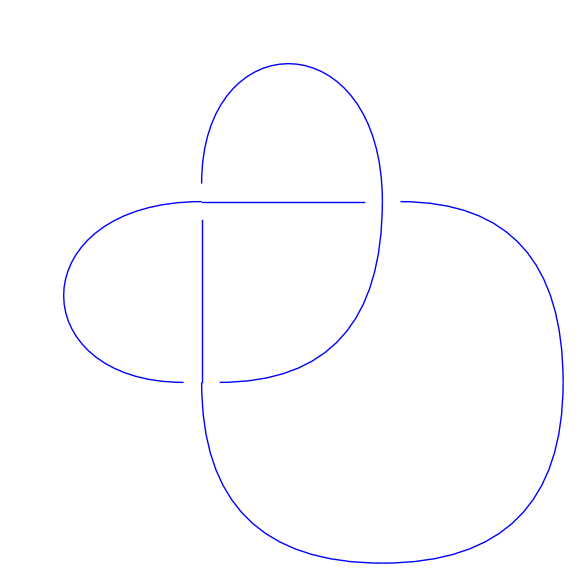

In [35]:
K.plot()

In [36]:
G = fundamental_group(K)

In [37]:
G

Finitely presented group < x0, x1, x2 | x2*x1*x2^-1*x0^-1, x1*x0*x1^-1*x2^-1, x0*x2*x0^-1*x1^-1 >

In [38]:
K

Knot represented by 3 crossings

In [39]:
K.oriented_gauss_code()

[[[1, -2, 3, -1, 2, -3]], [1, 1, 1]]

In [40]:
K.pd_code()

[[2, 1, 3, 4], [4, 3, 5, 6], [6, 5, 1, 2]]

In [41]:
K.braid()

s^3

In [42]:
G.simplified()

Finitely presented group < x0, x1 | x0^-1*x1*x0*x1*x0^-1*x1^-1 >

In [43]:
K5 = Knot(B([1,1,1,1,1]))

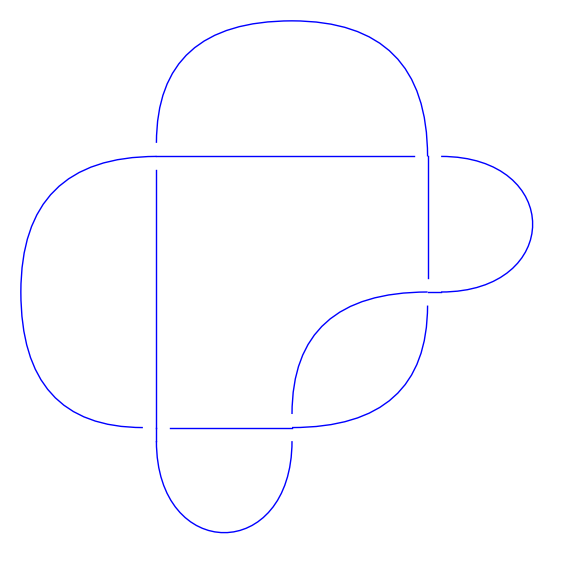

In [44]:
K5.plot()

In [45]:
G5 = fundamental_group(K5)

In [46]:
G5

Finitely presented group < x0, x1, x2, x3, x4 | x4*x2*x4^-1*x1^-1, x2*x0*x2^-1*x4^-1, x0*x3*x0^-1*x2^-1, x3*x1*x3^-1*x0^-1, x1*x4*x1^-1*x3^-1 >

In [47]:
G5.simplified()

Finitely presented group < x1, x4 | x4^-1*x1^-1*(x4*x1)^2*x4*x1^-1*x4^-1*x1^-1 >

In [48]:
R = G5.rewriting_system()

In [49]:
R.make_confluent()

KeyboardInterrupt: 

In [50]:
R

Rewriting system of Finitely presented group < x0, x1, x2, x3, x4 | x4*x2*x4^-1*x1^-1, x2*x0*x2^-1*x4^-1, x0*x3*x0^-1*x2^-1, x3*x1*x3^-1*x0^-1, x1*x4*x1^-1*x3^-1 >
with rules:
    x1^-1*x3^-1    --->    x0^-1*x2^-1
    x1*x4    --->    x0*x3
    x2^-1*x0    --->    x0*x3^-1
    x2^-1*x1    --->    x0*x4^-1
    x2^-1*x3    --->    x0*x1^-1
    x2^-1*x4^-1    --->    x0^-1*x2^-1
    x2^-1*x4    --->    x0*x2^-1
    x2*x0    --->    x0*x3
    x3^-1*x0^-1    --->    x0^-1*x2^-1
    x3^-1*x0    --->    x1*x3^-1
    x3^-1*x1    --->    x1*x4^-1
    x3^-1*x2    --->    x1*x0^-1
    x3^-1*x4    --->    x1*x2^-1
    x3*x0^-1    --->    x0^-1*x2
    x3*x1^-1    --->    x0^-1*x3
    x3*x1    --->    x0*x3
    x3*x2^-1    --->    x0^-1*x4
    x3*x4^-1    --->    x0^-1*x1
    x4^-1*x0    --->    x2*x3^-1
    x4^-1*x1^-1    --->    x0^-1*x2^-1
    x4^-1*x1    --->    x2*x4^-1
    x4^-1*x2    --->    x2*x0^-1
    x4^-1*x3    --->    x2*x1^-1
    x4*x0^-1    --->    x1^-1*x2
    x4*x1^-1    --->    x1

In [51]:
G.inject_variables()

Defining x0, x1, x2


In [53]:
R.reduce(x2*x1*x0)

x2*x1*x0